In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

# Clustering Analysis

In [2]:
data_pca = pd.read_csv("./outputs/data_pca_03.csv")

#### Use first 4 components in clustering analysis

In [3]:
data_pca = data_pca[["0","1","2","3"]]
data_pca

,0,1,2,3
0,1.522264,-2.368892,1.262914,-1.970251
1,0.196287,-1.907848,1.274403,-0.759929
2,-0.020496,-2.419280,0.008452,-0.039067
3,-0.205647,-2.615127,0.569245,-0.329614
4,0.626374,-2.653085,-0.095699,0.956294
5,0.044464,-2.333370,0.097017,0.786914
6,1.574458,-2.196548,0.526860,-2.067815
7,1.046091,-2.857860,0.083131,-1.001705
8,0.516448,-3.466033,0.271093,0.521427
9,1.081697,-2.694990,0.856334,0.151628


## Agglomerative Clustering
> identifies 3 clusters within pca data

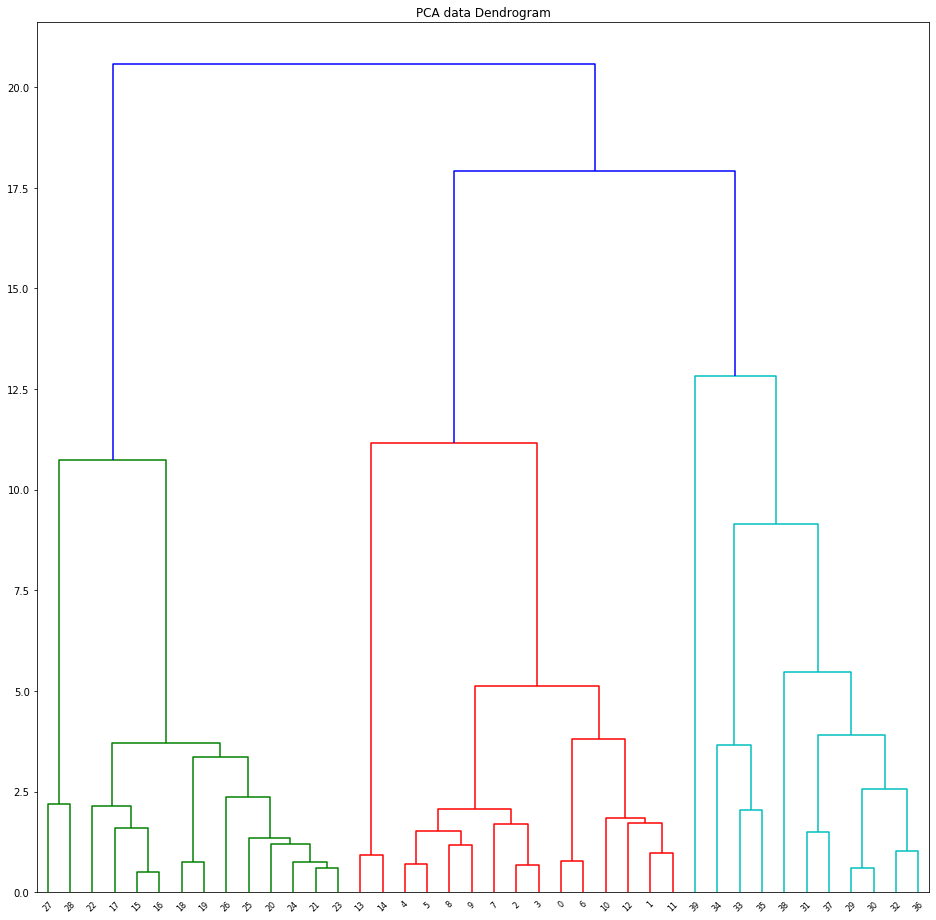

In [4]:
plt.figure(figsize =(16, 16)) 

plt.title('PCA data Dendrogram') 

Dendrogram = shc.dendrogram((shc.linkage(data_pca, method ='ward')))

### Compare results with different number of clusters

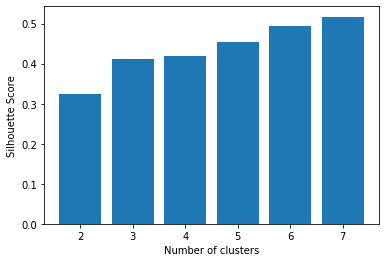

0.4108563460678141


In [5]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(data_pca, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(data_pca))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 
print(silhouette_scores[1])

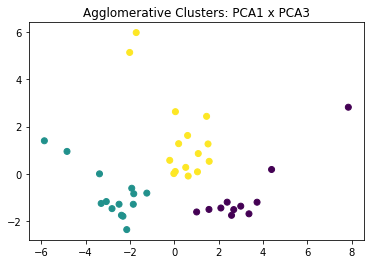

In [6]:
# Visualize the clustering 

plt.scatter(data_pca["0"], data_pca["2"],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(data_pca))
plt.title("Agglomerative Clusters: PCA1 x PCA3")
plt.show()

### Vizualize clusters by window
> stair-step pattern reveals that clusters are grouped by repetition, as was observed in gesture reconstruction

In [7]:
agg = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
cluster_preds = agg.fit_predict(data_pca)
data_pca['preds'] = cluster_preds

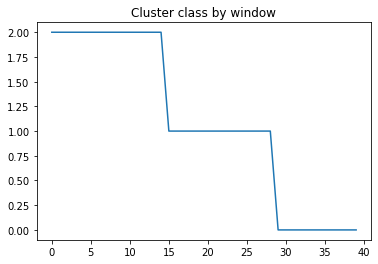

In [8]:
plt.plot(data_pca.index, data_pca['preds'].tolist())
plt.title("Cluster class by window");

## K-means Clustering

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(data_pca)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

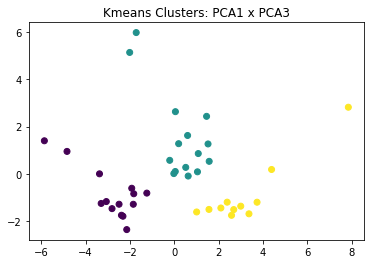

In [10]:
# Visualize the clustering 

plt.scatter(data_pca["0"], data_pca["2"],  
           c = kmeans.labels_)
plt.title("Kmeans Clusters: PCA1 x PCA3")
plt.show()

In [11]:
preds = kmeans.fit_predict(data_pca)
data_pca['preds'] = preds

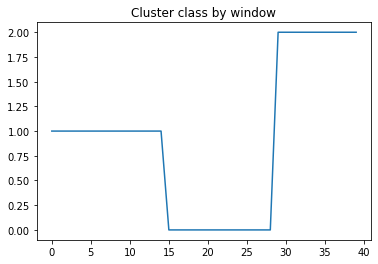

In [12]:
plt.plot(data_pca.index, data_pca['preds'].tolist())
plt.title("Cluster class by window");

## Elbow Method: K size validation
> "kink" in curve at k=3 further validates observation of 3 clusters, which are here being interpretted as 3 unique gestures

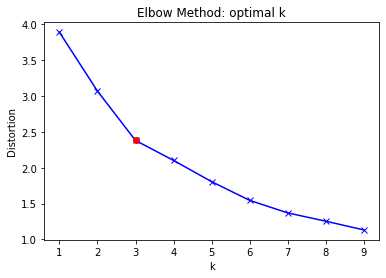

In [13]:
from sklearn import metrics
from scipy.spatial import distance

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_pca)
    kmeanModel.fit(data_pca)
    distortions.append(sum(np.min(distance.cdist(data_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data_pca.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.plot(K[2], distortions[2], 'ro')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method: optimal k')
plt.show()
